# Random numbers

Creating a random set of numbers. First of all we import the needed packages for the lecture:

In [2]:
import pickle 
import numpy as np

from scipy.stats import norm # normal dist

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black", "grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({"font.size":14})


Now we generate, lets say 3, random numbers between 0-1.000:

In [3]:
X = np.random.randint(0,1000,size=3)
print(X)

[415  11 581]


But randomness is not good in scientific economics since we want to be able to reproduce our results. The solution to this problem is **seed**:

In [4]:
print('set seed to 500 and create numbers:')
np.random.seed(500)
print(np.random.uniform(size=3)) # the output should be the same 3 numbers from an uniform dist. (0-1)



set seed to 500 and create numbers:
[0.69367953 0.06171699 0.6666116 ]


We're also able to **save and load the state** of a random number generator:

In [5]:
# a. save state
state = np.random.get_state()
print('Generate numbers from current state:')
print(np.random.uniform(size=3))

# b. draw some random number (changing state)
print('\nChange state by generating some more numbers:')
print(np.random.uniform(size=3))

# c. reset state (go back to a.)
np.random.set_state(state)

# d. draw the same random numbers again
print('\nGenerate same numbers from state by reloading state:')
print(np.random.uniform(size=3))

# To my understanding, we set_state to the state from point a. and get the same numbers. Another way of using seed.


Generate numbers from current state:
[0.55920894 0.08511062 0.39241906]

Change state by generating some more numbers:
[0.49707753 0.33214907 0.34233845]

Generate same numbers from state by reloading state:
[0.55920894 0.08511062 0.39241906]


## Different distributions 

In [6]:
X = np.random.normal(loc=0,scale=1,size=10**6)
# loc is the mean, scale is the standard deviation and size is number of draws
Y = np.random.beta(a=5,b=2,size=10**6)
# a is alpha and b is beta
Z = np.random.uniform(low=-2,high=2,size=10**6)
# default is 0-1, here we set the distribution from -2 to 2

It's possible to create user-defined distributions

In [7]:
# a. support of distribution
vec = np.array([-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])

# b. define propabilities
prob = np.exp(np.linspace(-1,1,vec.size))**1.1254 
# all positive numbers
prob /= np.sum(prob)
# make propabilities sum to 1

# c. get draws from dist
k = np.random.choice(vec,size=10**6,p=prob)

We then plot the different distributions:

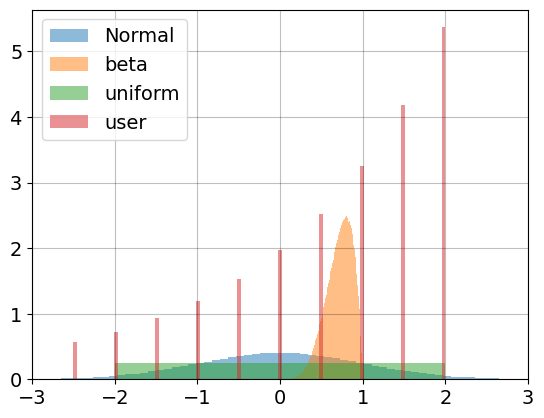

In [8]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.hist(X,bins=100,density=True,alpha=0.5,label='Normal')
ax.hist(Y,bins=100,density=True,alpha=0.5,label='beta')
ax.hist(Z,bins=100,density=True,alpha=0.5,label='uniform')
ax.hist(k,bins=100,density=True,alpha=0.5,label='user')
ax.set_xlim([-3,3])
ax.legend(loc='upper left');

Our figure could look significantly better if we change number of draws :) 

## Analytical results

How close are our draws to a normal distribution?

`scipy.stats.norm` comes in handy:


F pdf at 0.0: 0.503 
F cdf at 0.0: 0.369


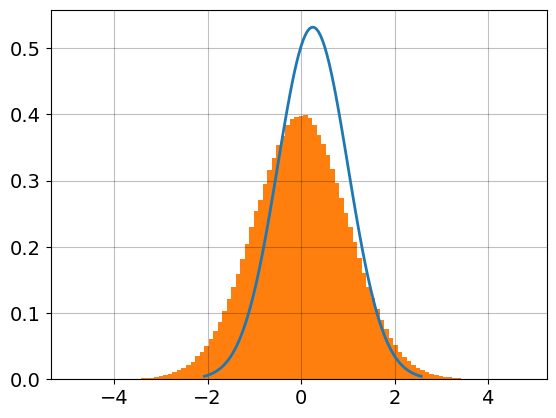

In [9]:
from scipy.stats import norm

# a. create analytical dist
loc_guess = 0.25
scale_guess = 0.75
# change to 0 and 1 for better fit in the plot underneath

# object to generate random numbers 
F = norm(loc=loc_guess,scale=scale_guess)
rnd = F.rvs(3) # example: create 3 random draws from distribution F
print(f'F pdf at 0.0: {F.pdf(0.0):1.3f} \nF cdf at 0.0: {F.cdf(0.0):1.3f}')

# b. vector of values 
x_low = F.ppf(0.001) # x value where cdf is 0.001
x_high = F.ppf(0.999) # x value where cdf is 0.999
x_support = np.linspace(x_low,x_high,100)
x_guess = F.pdf(x_support) # call F to evaluate density at x_support 

# c. compare X from before with new distribution
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x_support,x_guess,lw=2,label='estimated')
ax.hist(X,bins=100,density=True,histtype='stepfilled');


Pickle is a good way to loading and saving (læs op på det her igen, its all about loading and saving data)

In [10]:
# a. variables 
my_dict = {'a':1,'b':2}
my_vec = np.array([1,2,3])
my_tupple = (1,4,2)

# b. put them in a dictionary 
my_data = {}
my_data['my_dict'] = my_dict
my_data['my_vec'] = my_vec
my_data['my_tupple'] = my_tupple

# c. save the dictionary in a file
with open(f'data.p','wb') as f: # wb: write binary 
    pickle.dump(my_data, f)

## Creating random numbers using class

In [14]:
class dice_cup: #think of it as a cup of dices
    
    def __init__(self,ndice):
        self.ndice = ndice # initialize it, by saying how many dices there are in the cup

    def roll(self):
        self.dice = np.random.randint(1,7,size=self.ndice)
        print(self.dice) # generate the roll - the dices have the value 1-6 and is dependandant on how many dices we want

    def shuffle(self):
        np.random.shuffle(self.dice)
        print(self.dice) # shuffle the cup, shuffling the order 

    def roll_and_sum(self):
        # task: try to make a variable that shows the sum of eyes. 
        self.roll()
        print(np.sum(self.dice))

my_dice_cup = dice_cup(4)
my_dice_cup.roll()
my_dice_cup.shuffle()
my_dice_cup.roll_and_sum()


[2 2 1 2]
[2 2 1 2]
[6 5 2 5]
18


**Summary:** methods learned in this lecture is important when we encounter models withe many heterogeneous agents